# Chapter 2 - **AI Tools**

In this notebook we're going to take a **Titanic Dataset** available at Kaggle [[link](https://www.kaggle.com/c/titanic/data)]

It has **3** main sections: **Exploratory Data Analysis**, **Feature Engineering** and **Model Comparison**.

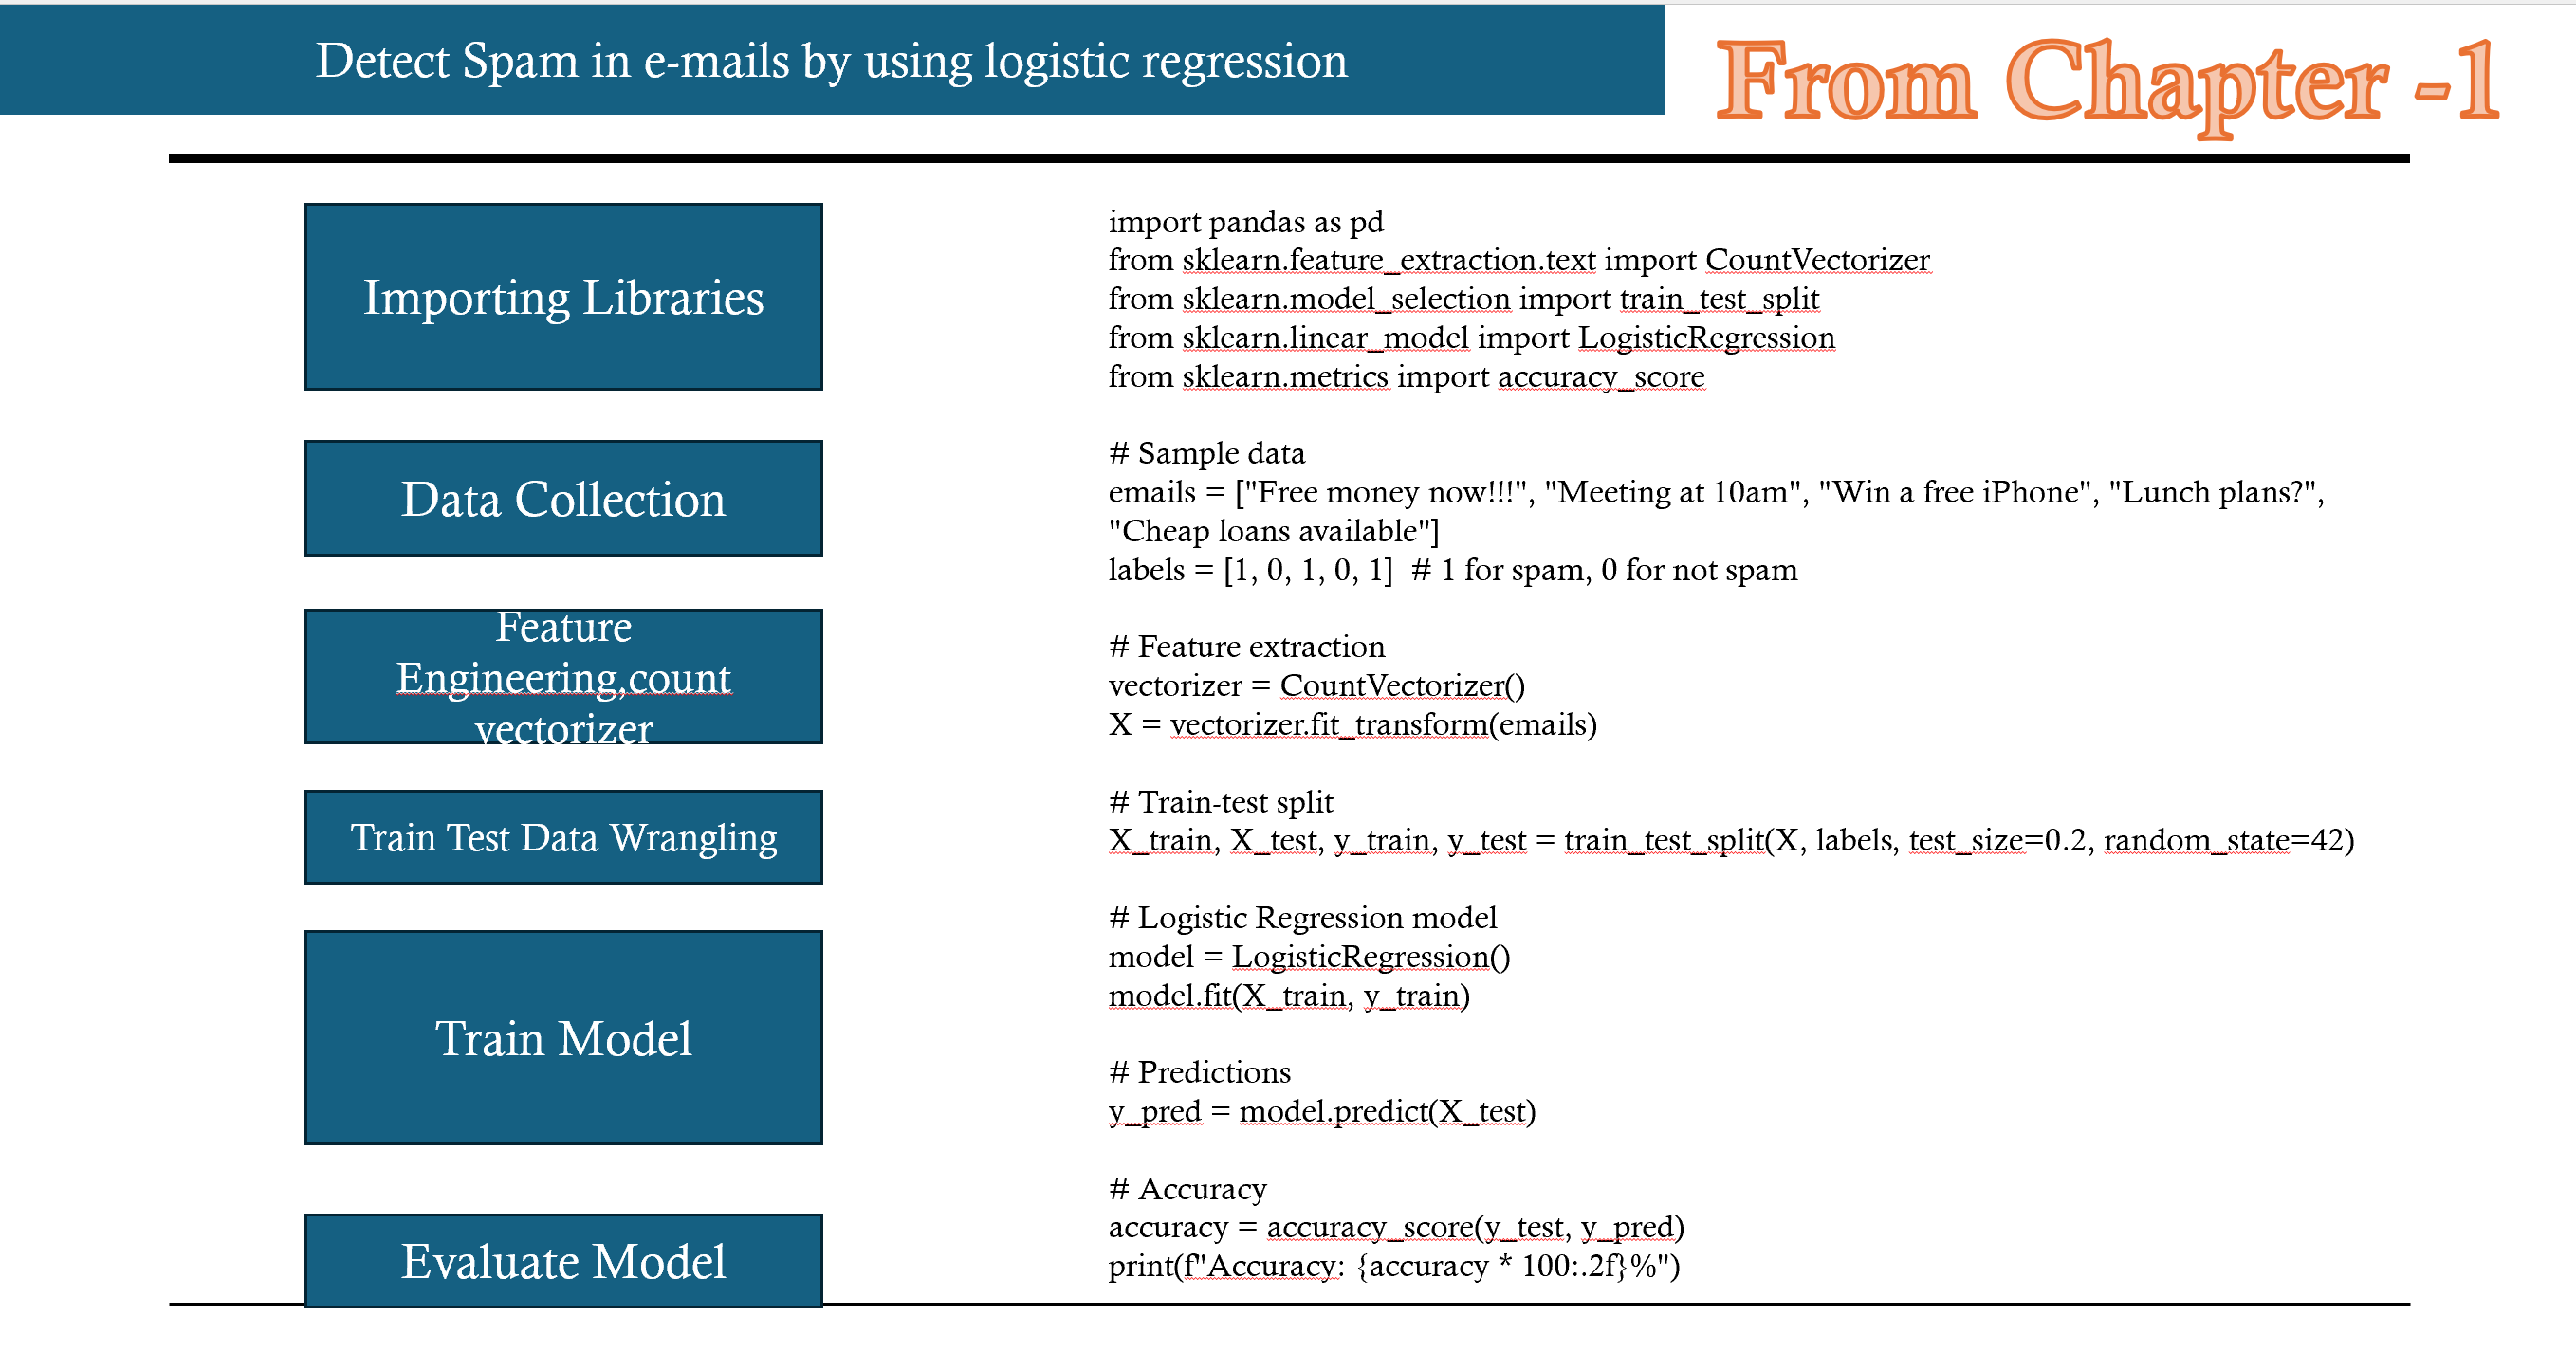

---


#### Problem Statement: Given a data about passengers, our Goal is to predict which passenger will survive.

About dataset:

### Data Dictionary
| **Variable** | **Definition** | **Key** |
|--|--|--|
| survival | Survival | 0 = No, 1 = Yes |
| pclass | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd |
| sex | Gender |  |
| Age | Age in years |  |
| sibsp | # of siblings / spouses aboard the Titanic |  |
| parch | # of parents / children aboard the Titanic |  |
| ticket | Ticket number |  |
| fare | Passenger fare |  |
| cabin | Cabin number |  |
| embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton |
|  |  |  |


### Variable Notes

**pclass**: A proxy for socio-economic status (SES)  
1st = Upper  
2nd = Middle  
3rd = Lower  
  
**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5  
  
**sibsp**: The dataset defines family relations in this way...  
Sibling = brother, sister, stepbrother, stepsister  
Spouse = husband, wife
  
**parch**: The dataset defines family relations in this way...  
Parent = mother, father  
Child = daughter, son, stepdaughter, stepson  
Some children travelled only with a nanny, therefore parch=0 for them.

In [1]:
import pandas as pd

SEED = 42

df_train = pd.read_csv('Dataset/Titanic/train.csv')
df_test = pd.read_csv('Dataset/Titanic/test.csv')

print(f'Number of Training Examples = {df_train.shape[0]}')
print(f'Number of Test Examples = {df_test.shape[0]}')
print(f'Training Shape = {df_train.shape}')
print(df_train.columns)

print(f'Test Shape = {df_test.shape}')
print(df_test.columns)

Number of Training Examples = 891
Number of Test Examples = 418
Training Shape = (891, 12)
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Test Shape = (418, 11)
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


#### Now let's see some sample data (random_state argument is option, just set to make sure everyone in this session sees same things)

In [2]:
print(df_train.info())
df_train.sample(n=10, random_state=SEED)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


PassengerId  Survived  Pclass  \
709          710         1       3   
439          440         0       2   
840          841         0       3   
720          721         1       2   
39            40         1       3   
290          291         1       1   
300          301         1       3   
333          334         0       3   
208          209         1       3   
136          137         1       1   

                                                  Name     Sex   Age  SibSp  \
709  Moubarek, Master. Halim Gonios ("William George")    male   NaN      1   
439             Kvillner, Mr. Johan Henrik Johannesson    male  31.0      0   
840                        Alhomaki, Mr. Ilmari Rudolf    male  20.0      0   
720                  Harper, Miss. Annie Jessie "Nina"  female   6.0      0   
39                         Nicola-Yarred, Miss. Jamila  female  14.0      1   
290                       Barber, Miss. Ellen "Nellie"  female  26.0      0   
300           Kelly, Miss. Anna Katherine "Annie Kate"  female   NaN      0   
333                    Vander Planke, Mr. Leo Edmondus    male  16.0      2   
208                          Carr, Miss. Helen "Ellen"  female  16.0      0   
136                       Newsom, Miss. Helen Monypeny  female  19.0      0   

     Parch            Ticket     Fare Cabin Embarked  
709      1              2661  15.2458   NaN        C  
439      0        C.A. 18723  10.5000   NaN        S  
840      0  SOTON/O2 3101287   7.9250   NaN        S  
720      1            248727  33.0000   NaN        S  
39       0              2651  11.2417   NaN        C  
290      0             19877  78.8500   NaN        S  
300      0              9234   7.7500   NaN        Q  
333      0            345764  18.0000   NaN        S  
208      0            367231   7.7500   NaN        Q  
136      2             11752  26.2833   D47        S

In [3]:
print(df_test.info())
df_test.sample(n=10, random_state=SEED)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB
None


PassengerId  Pclass                                            Name  \
321         1213       3                           Krekorian, Mr. Neshan   
324         1216       1                          Kreuchen, Miss. Emilie   
388         1280       3                            Canavan, Mr. Patrick   
56           948       3                                 Cor, Mr. Bartol   
153         1045       3  Klasen, Mrs. (Hulda Kristina Eugenia Lofqvist)   
30           922       2                    Louch, Mr. Charles Alexander   
72           964       3                  Nieminen, Miss. Manta Josefina   
82           974       1                          Case, Mr. Howard Brown   
258         1150       2                         Bentham, Miss. Lilian W   
416         1308       3                             Ware, Mr. Frederick   

        Sex   Age  SibSp  Parch      Ticket      Fare  Cabin Embarked  
321    male  25.0      0      0        2654    7.2292  F E57        C  
324  female  39.0      0      0       24160  211.3375    NaN        S  
388    male  21.0      0      0      364858    7.7500    NaN        Q  
56     male  35.0      0      0      349230    7.8958    NaN        S  
153  female  36.0      0      2      350405   12.1833    NaN        S  
30     male  50.0      1      0  SC/AH 3085   26.0000    NaN        S  
72   female  29.0      0      0     3101297    7.9250    NaN        S  
82     male  49.0      0      0       19924   26.0000    NaN        S  
258  female  19.0      0      0       28404   13.0000    NaN        S  
416    male   NaN      0      0      359309    8.0500    NaN        S

### Decision Trees 
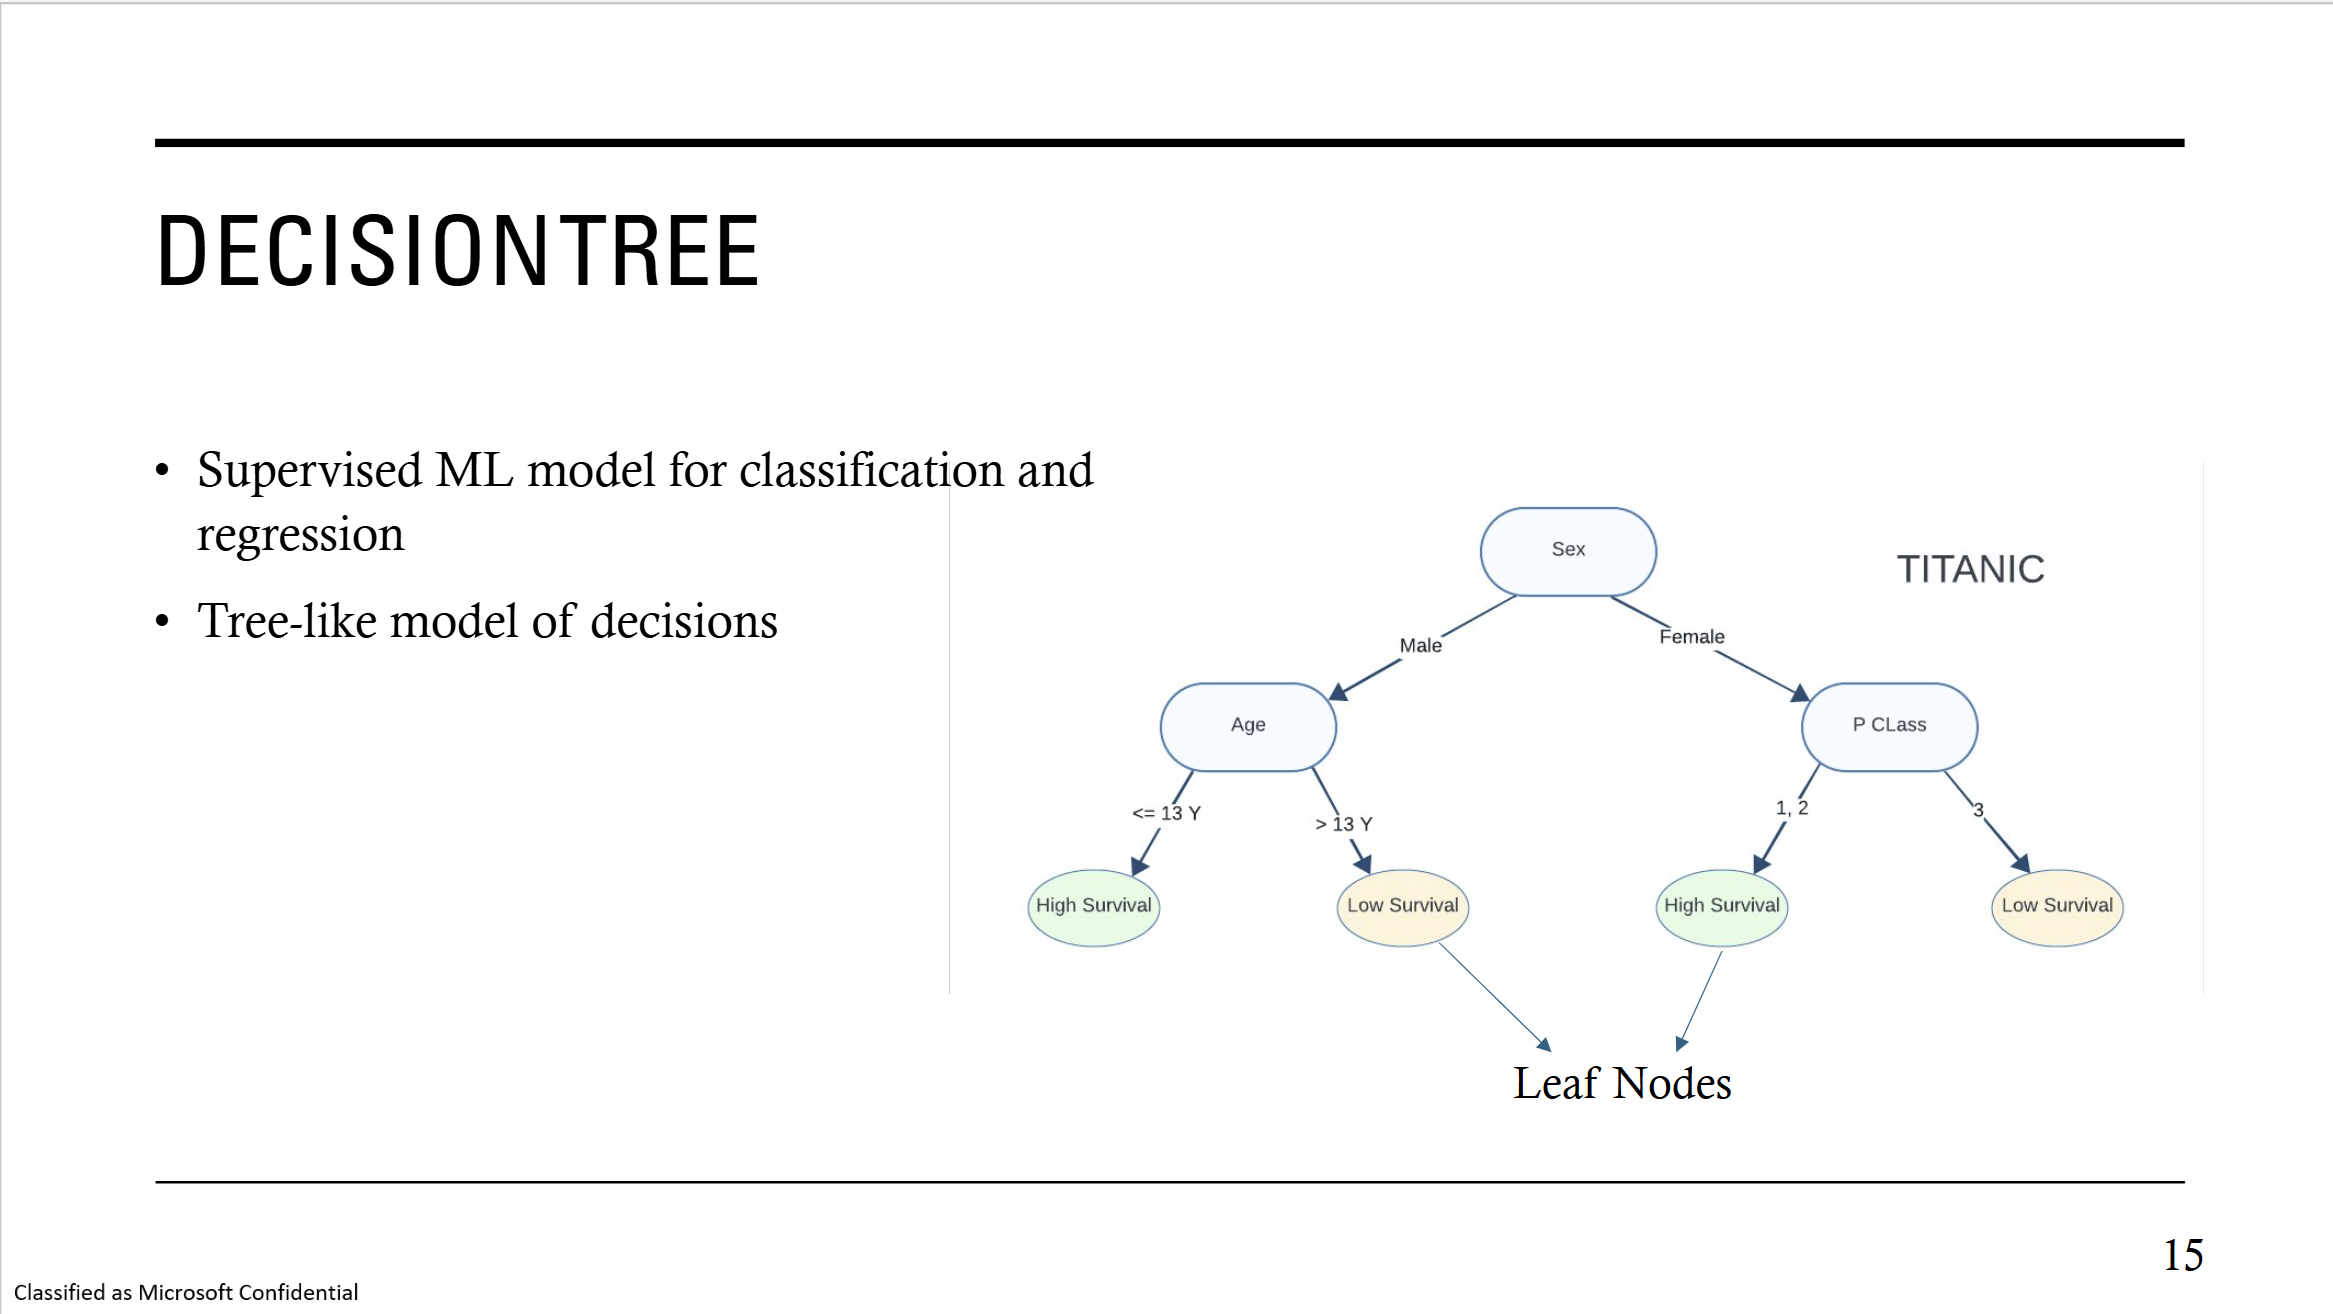

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# a function to take dataframe as input and predict the survival
def evaluate_training_model_20(df, model):
    # split the data into train and test
    X = df.drop(['Survived'], axis=1)
    y = df['Survived']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)
    
    # train a model
    model.fit(X_train, y_train)
    
    # predict the survival
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    # calculate the accuracy
    from sklearn.metrics import accuracy_score
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_train = accuracy_score(y_train, y_train_pred)
    print(f'Accuracy: {accuracy}')
    return accuracy, accuracy_train

df_numeric = df_train.select_dtypes(include=['number'])
evaluate_training_model_20(df_numeric, DecisionTreeClassifier())

Accuracy: 0.659217877094972


(0.659217877094972, 0.9957865168539326)

## Visualizing Decision Tree

Accuracy: 0.7150837988826816


[Text(0.5, 0.875, 'Pclass <= 2.5\ngini = 0.469\nsamples = 712\nvalue = [444, 268]\nclass = Survived'),
 Text(0.25, 0.625, 'Fare <= 52.277\ngini = 0.495\nsamples = 314\nvalue = [142, 172]\nclass = Died'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'Age <= 15.0\ngini = 0.496\nsamples = 207\nvalue = [113, 94]\nclass = Survived'),
 Text(0.0625, 0.125, 'gini = 0.0\nsamples = 16\nvalue = [0, 16]\nclass = Died'),
 Text(0.1875, 0.125, 'gini = 0.483\nsamples = 191\nvalue = [113, 78]\nclass = Survived'),
 Text(0.375, 0.375, 'PassengerId <= 161.5\ngini = 0.395\nsamples = 107\nvalue = [29.0, 78.0]\nclass = Died'),
 Text(0.3125, 0.125, 'gini = 0.49\nsamples = 14\nvalue = [8, 6]\nclass = Survived'),
 Text(0.4375, 0.125, 'gini = 0.35\nsamples = 93\nvalue = [21, 72]\nclass = Died'),
 Text(0.75, 0.625, 'Age <= 6.5\ngini = 0.366\nsamples = 398\nvalue = [302, 96]\nclass = Survived'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'SibSp <= 2.5\ngini = 0.497\nsamples = 26\nvalue = [12, 14]\ncla

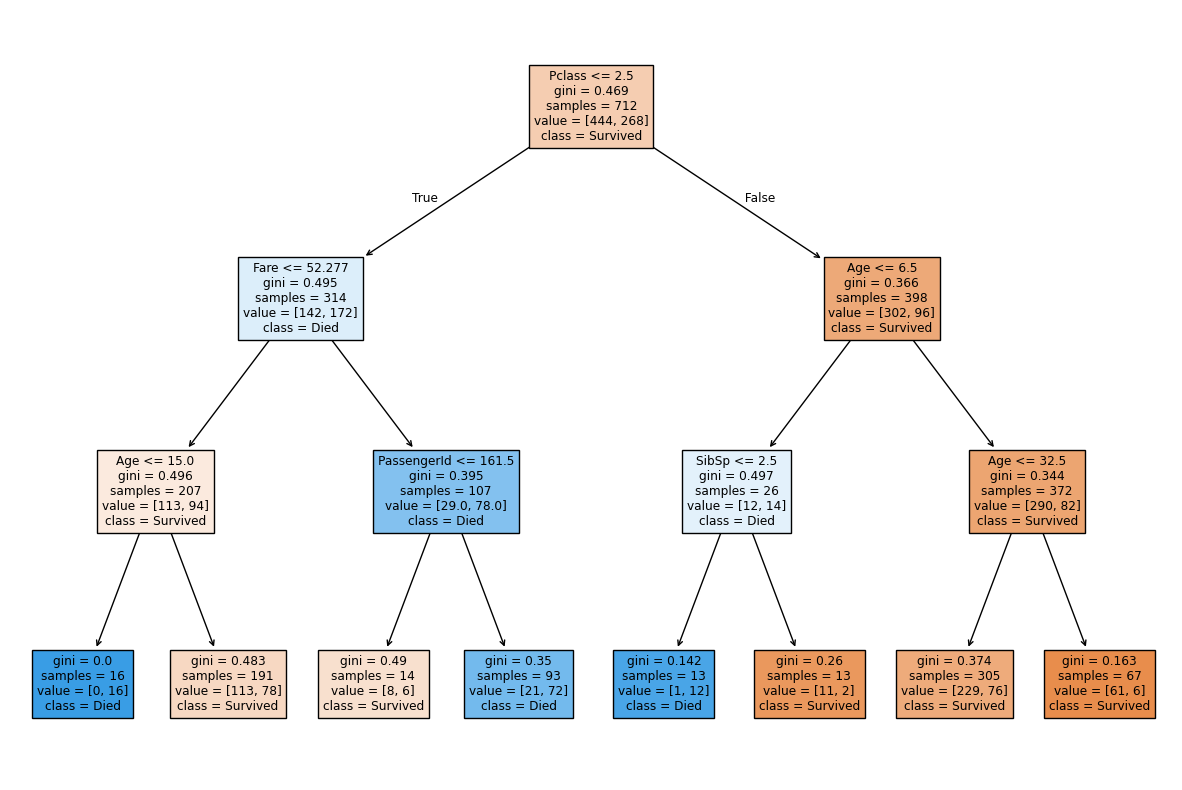

In [5]:
from sklearn import tree
import matplotlib.pyplot as plt

small_descision_tree = DecisionTreeClassifier(max_depth=3, random_state=SEED)
evaluate_training_model_20(df_numeric, small_descision_tree)

plt.subplots(figsize=(15, 10))
tree.plot_tree(small_descision_tree, filled=True, feature_names=df_numeric.drop('Survived', axis=1).columns, class_names=['Survived', 'Died'])

#### What is Correlation?
A statistical tool that helps in the study of the relationship between two variables is known as **Correlation**

Two Variables are said to be Correlated if:
The two variables are said to be correlated if a change in one causes a corresponding change in the other variable.

For example, increase in CPU usage leads to increase in laptop's temperature. (but correlation doesn't mean causation)

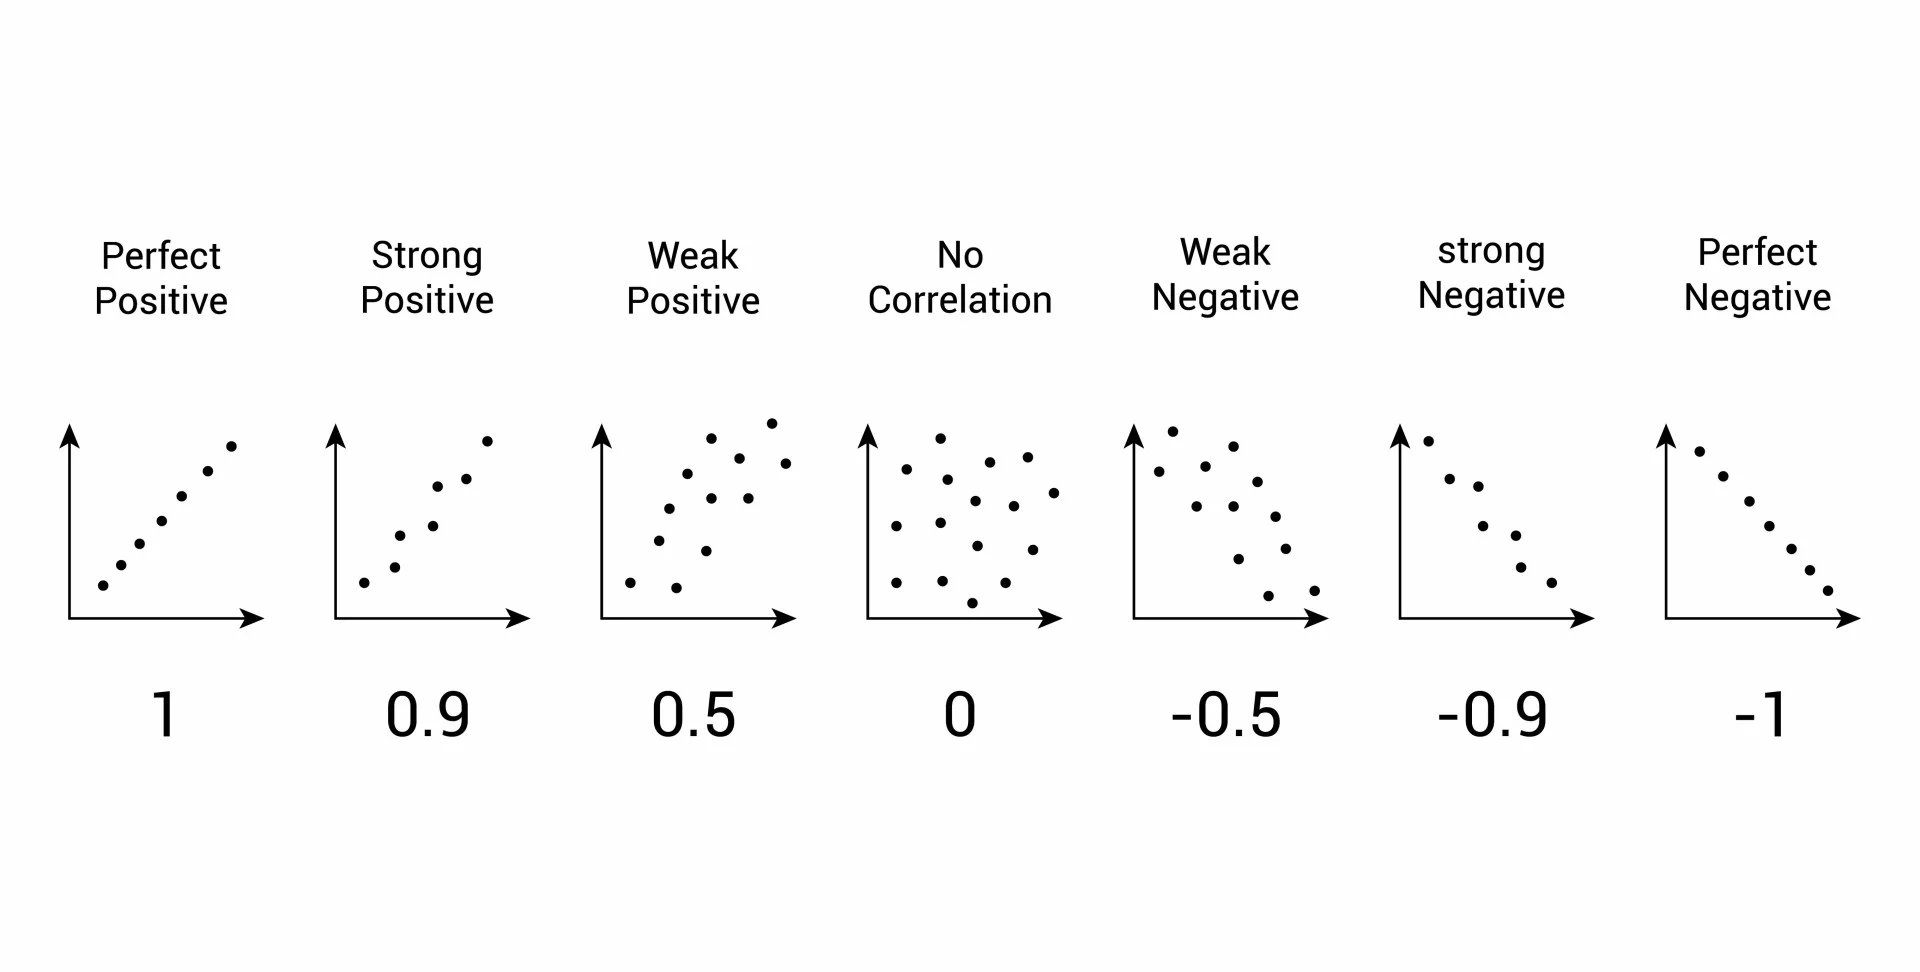

In [6]:
numeric_corr = df_train.corr(numeric_only=True).abs()

<Axes: >

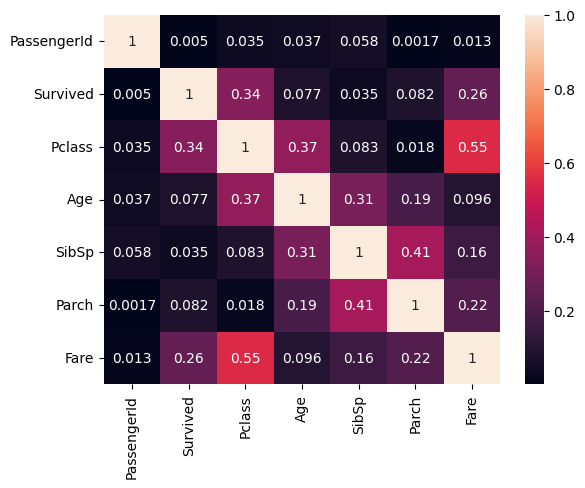

In [7]:
import seaborn as sns
sns.heatmap(numeric_corr, annot=True)

### Bivariate Analysis
-----
##### 🤔 How is Pclass related to survival?

> **pclass**: A proxy for socio-economic status (SES)  
  1st = Upper  
  2nd = Middle  
  3rd = Lower  

<Axes: xlabel='Pclass', ylabel='count'>

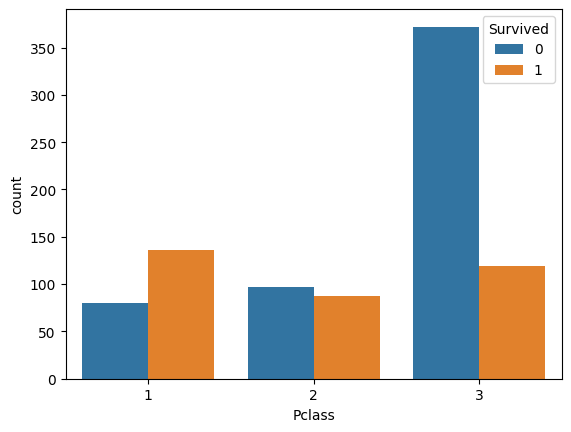

In [8]:
sns.countplot(data=df_train, x='Pclass', hue='Survived')

##### 🤔 How is Sex related to survival?

<Axes: xlabel='Sex', ylabel='count'>

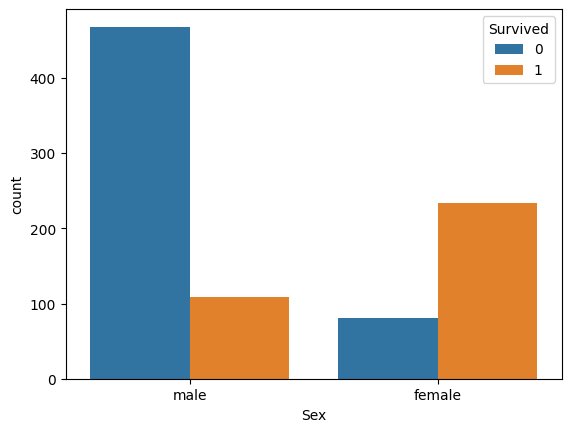

In [9]:
sns.countplot(data=df_train, x='Sex', hue='Survived')

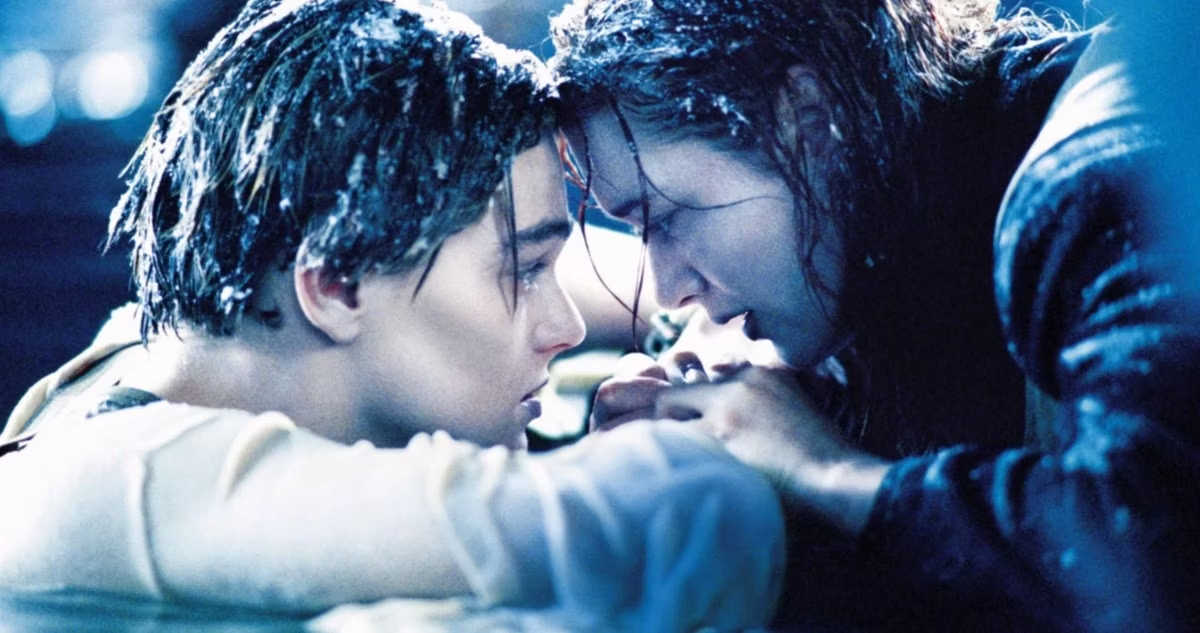

In [10]:
from sklearn.metrics import accuracy_score

class Simple_prediction:
    def fit(self, X_train, Y_train):
        pass
    def predict(self, df):
        y_pred = df['Sex'].apply(lambda x: 1 if x=='female' else 0)
        return y_pred

evaluate_training_model_20(df_train, Simple_prediction())

Accuracy: 0.7821229050279329


(0.7821229050279329, 0.7879213483146067)

##### How is age releated to survival?

<Axes: xlabel='Age', ylabel='Survived'>

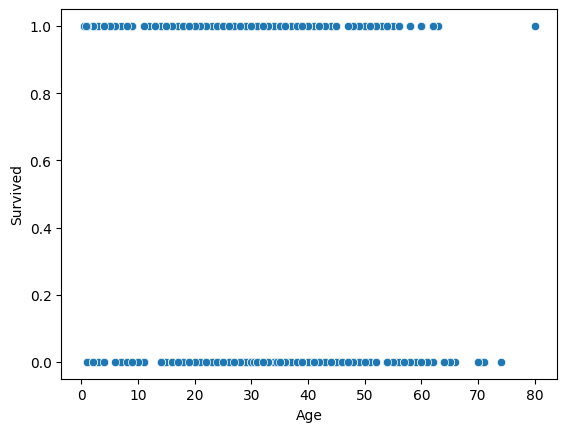

In [11]:
sns.scatterplot(data=df_train, x='Age', y='Survived')

### **Missing Values**

As seen from below, some columns have missing values. `display_missing` function shows the count of missing values in every column.
* Training set have missing values in `Age`, `Cabin` and `Embarked` columns

In [12]:
def print_missing_values(df):
    found_missing = False
    for col in df.columns:
        numberOfNulls = df[col].isnull().sum()
        if numberOfNulls:
            print(f"{col} has {numberOfNulls} missing values")
            found_missing = True
    if not found_missing:
        print("Dataset has no missing value")

print_missing_values(df_train)

Age has 177 missing values
Cabin has 687 missing values
Embarked has 2 missing values


In [13]:
df_train = df_train.drop('Cabin', axis=1) # axis is 0 for rows and 1 for columns
print_missing_values(df_train)

Age has 177 missing values
Embarked has 2 missing values


##### Missing Emabarked
Let's fill the 2 missing values of embarked with most popular embark points

In [14]:
df_train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [15]:
df_train['Embarked'] = df_train['Embarked'].fillna('S')

In [16]:
print_missing_values(df_train)

Age has 177 missing values


##### Missing Age
Let's fill missing age with median age

In [17]:
median_age = df_train['Age'].median()
df_train['Age'] = df_train['Age'].fillna(median_age)

In [18]:
print_missing_values(df_train)

Dataset has no missing value


### Drop non-numeric, non-categorical columns
PassengerId, Name, Ticket

In [19]:
df_train = df_train.drop('PassengerId', axis=1)
df_train = df_train.drop('Name', axis=1)
df_train = df_train.drop('Ticket', axis=1)

df_train

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0           0       3    male  22.0      1      0   7.2500        S
1           1       1  female  38.0      1      0  71.2833        C
2           1       3  female  26.0      0      0   7.9250        S
3           1       1  female  35.0      1      0  53.1000        S
4           0       3    male  35.0      0      0   8.0500        S
..        ...     ...     ...   ...    ...    ...      ...      ...
886         0       2    male  27.0      0      0  13.0000        S
887         1       1  female  19.0      0      0  30.0000        S
888         0       3  female  28.0      1      2  23.4500        S
889         1       1    male  26.0      0      0  30.0000        C
890         0       3    male  32.0      0      0   7.7500        Q

[891 rows x 8 columns]

## Convert Categorical columns to numeric values

Some models can't work on categories like male/female(notably Linear Models and Neural Nets). So we do ***one hot encoding*** for all categorical columns in our data.

In [20]:
from sklearn.preprocessing import OneHotEncoder

def OHE(df, columns_to_encode, column_transformer=None):
    from sklearn.compose import ColumnTransformer
    if column_transformer == None:
        column_transformer = ColumnTransformer(
            transformers=[
                ('onehot', OneHotEncoder(drop='first'), columns_to_encode)
            ],
            remainder='passthrough'  # Keep the other columns as they are
        )
        column_transformer.fit(df)
    transformed_data = column_transformer.transform(df)
    encoded_columns = column_transformer.named_transformers_['onehot'].get_feature_names_out(columns_to_encode)
    all_columns = list(encoded_columns) + [col for col in df.columns if col not in columns_to_encode]

    # Create a DataFrame with the transformed data
    transformed_df = pd.DataFrame(transformed_data, columns=all_columns)
    return transformed_df, column_transformer

In [21]:
X_train, one_hot_encoder = OHE(df_train, ['Sex', 'Embarked']) # we'll need this one_hot_encoder later

In [22]:
X_train

Sex_male  Embarked_Q  Embarked_S  Survived  Pclass   Age  SibSp  Parch  \
0         1.0         0.0         1.0       0.0     3.0  22.0    1.0    0.0   
1         0.0         0.0         0.0       1.0     1.0  38.0    1.0    0.0   
2         0.0         0.0         1.0       1.0     3.0  26.0    0.0    0.0   
3         0.0         0.0         1.0       1.0     1.0  35.0    1.0    0.0   
4         1.0         0.0         1.0       0.0     3.0  35.0    0.0    0.0   
..        ...         ...         ...       ...     ...   ...    ...    ...   
886       1.0         0.0         1.0       0.0     2.0  27.0    0.0    0.0   
887       0.0         0.0         1.0       1.0     1.0  19.0    0.0    0.0   
888       0.0         0.0         1.0       0.0     3.0  28.0    1.0    2.0   
889       1.0         0.0         0.0       1.0     1.0  26.0    0.0    0.0   
890       1.0         1.0         0.0       0.0     3.0  32.0    0.0    0.0   

        Fare  
0     7.2500  
1    71.2833  
2     7.9250  
3    53.1000  
4     8.0500  
..       ...  
886  13.0000  
887  30.0000  
888  23.4500  
889  30.0000  
890   7.7500  

[891 rows x 9 columns]

### Did all this data processing help? Let's check

In [23]:
evaluate_training_model_20(X_train, DecisionTreeClassifier(random_state=SEED))

Accuracy: 0.7877094972067039


(0.7877094972067039, 0.9789325842696629)

##### Trying different depths of Tree

In [24]:
depths = []
accuracies = []
training_accuracies = []

for i in range(2, 16):
    print(f"Depth {i} -> ", end=' ')
    depths.append(i)
    clf = DecisionTreeClassifier(max_depth=i, random_state=SEED)
    test_accuracy, train_accuracy = evaluate_training_model_20(X_train, clf)
    accuracies.append(test_accuracy)
    training_accuracies.append(train_accuracy)
    

Depth 2 ->  Accuracy: 0.7653631284916201
Depth 3 ->  Accuracy: 0.7988826815642458
Depth 4 ->  Accuracy: 0.7988826815642458
Depth 5 ->  Accuracy: 0.7988826815642458
Depth 6 ->  Accuracy: 0.8044692737430168
Depth 7 ->  Accuracy: 0.7932960893854749
Depth 8 ->  Accuracy: 0.7877094972067039
Depth 9 ->  Accuracy: 0.7932960893854749
Depth 10 ->  Accuracy: 0.7877094972067039
Depth 11 ->  Accuracy: 0.7877094972067039
Depth 12 ->  Accuracy: 0.7821229050279329
Depth 13 ->  Accuracy: 0.7821229050279329
Depth 14 ->  Accuracy: 0.770949720670391
Depth 15 ->  Accuracy: 0.776536312849162


<Axes: >

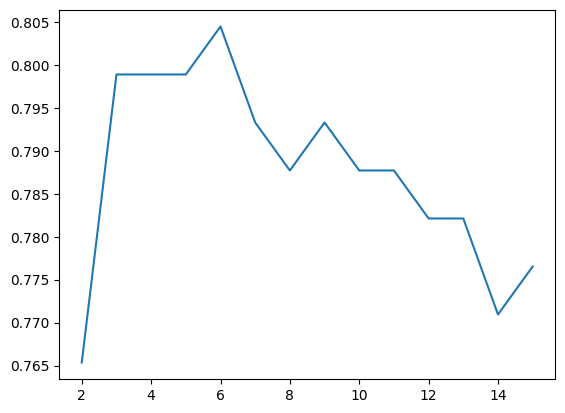

In [25]:
sns.lineplot(x=depths, y=accuracies)

<Axes: >

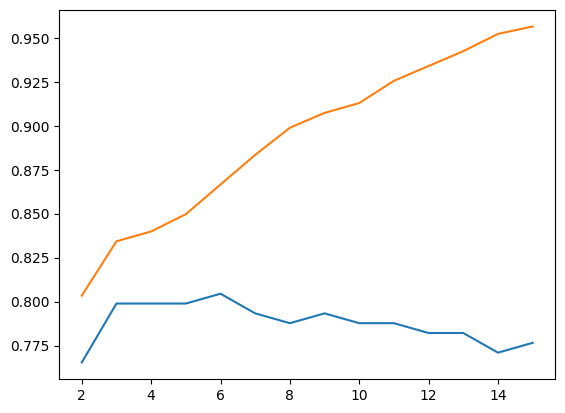

In [26]:
sns.lineplot(x=depths, y=accuracies)
sns.lineplot(x=depths, y=training_accuracies)

In [27]:
criterions_list = ["gini", "entropy", "log_loss"]
for criterion in criterions_list:
    print(criterion, end="->")
    clf = DecisionTreeClassifier(criterion=criterion, max_depth=6, random_state=SEED)
    evaluate_training_model_20(X_train, small_descision_tree)


gini->Accuracy: 0.7988826815642458
entropy->Accuracy: 0.7988826815642458
log_loss->Accuracy: 0.7988826815642458


💡 This is huge improvement over our first prediction (~67%)

But Decision Tree didn't fare well against our simple_prediction 🥲

How about **RandomForest**?

### Random Forest Crash Course 🔥

Random Forest is a ensemble model.

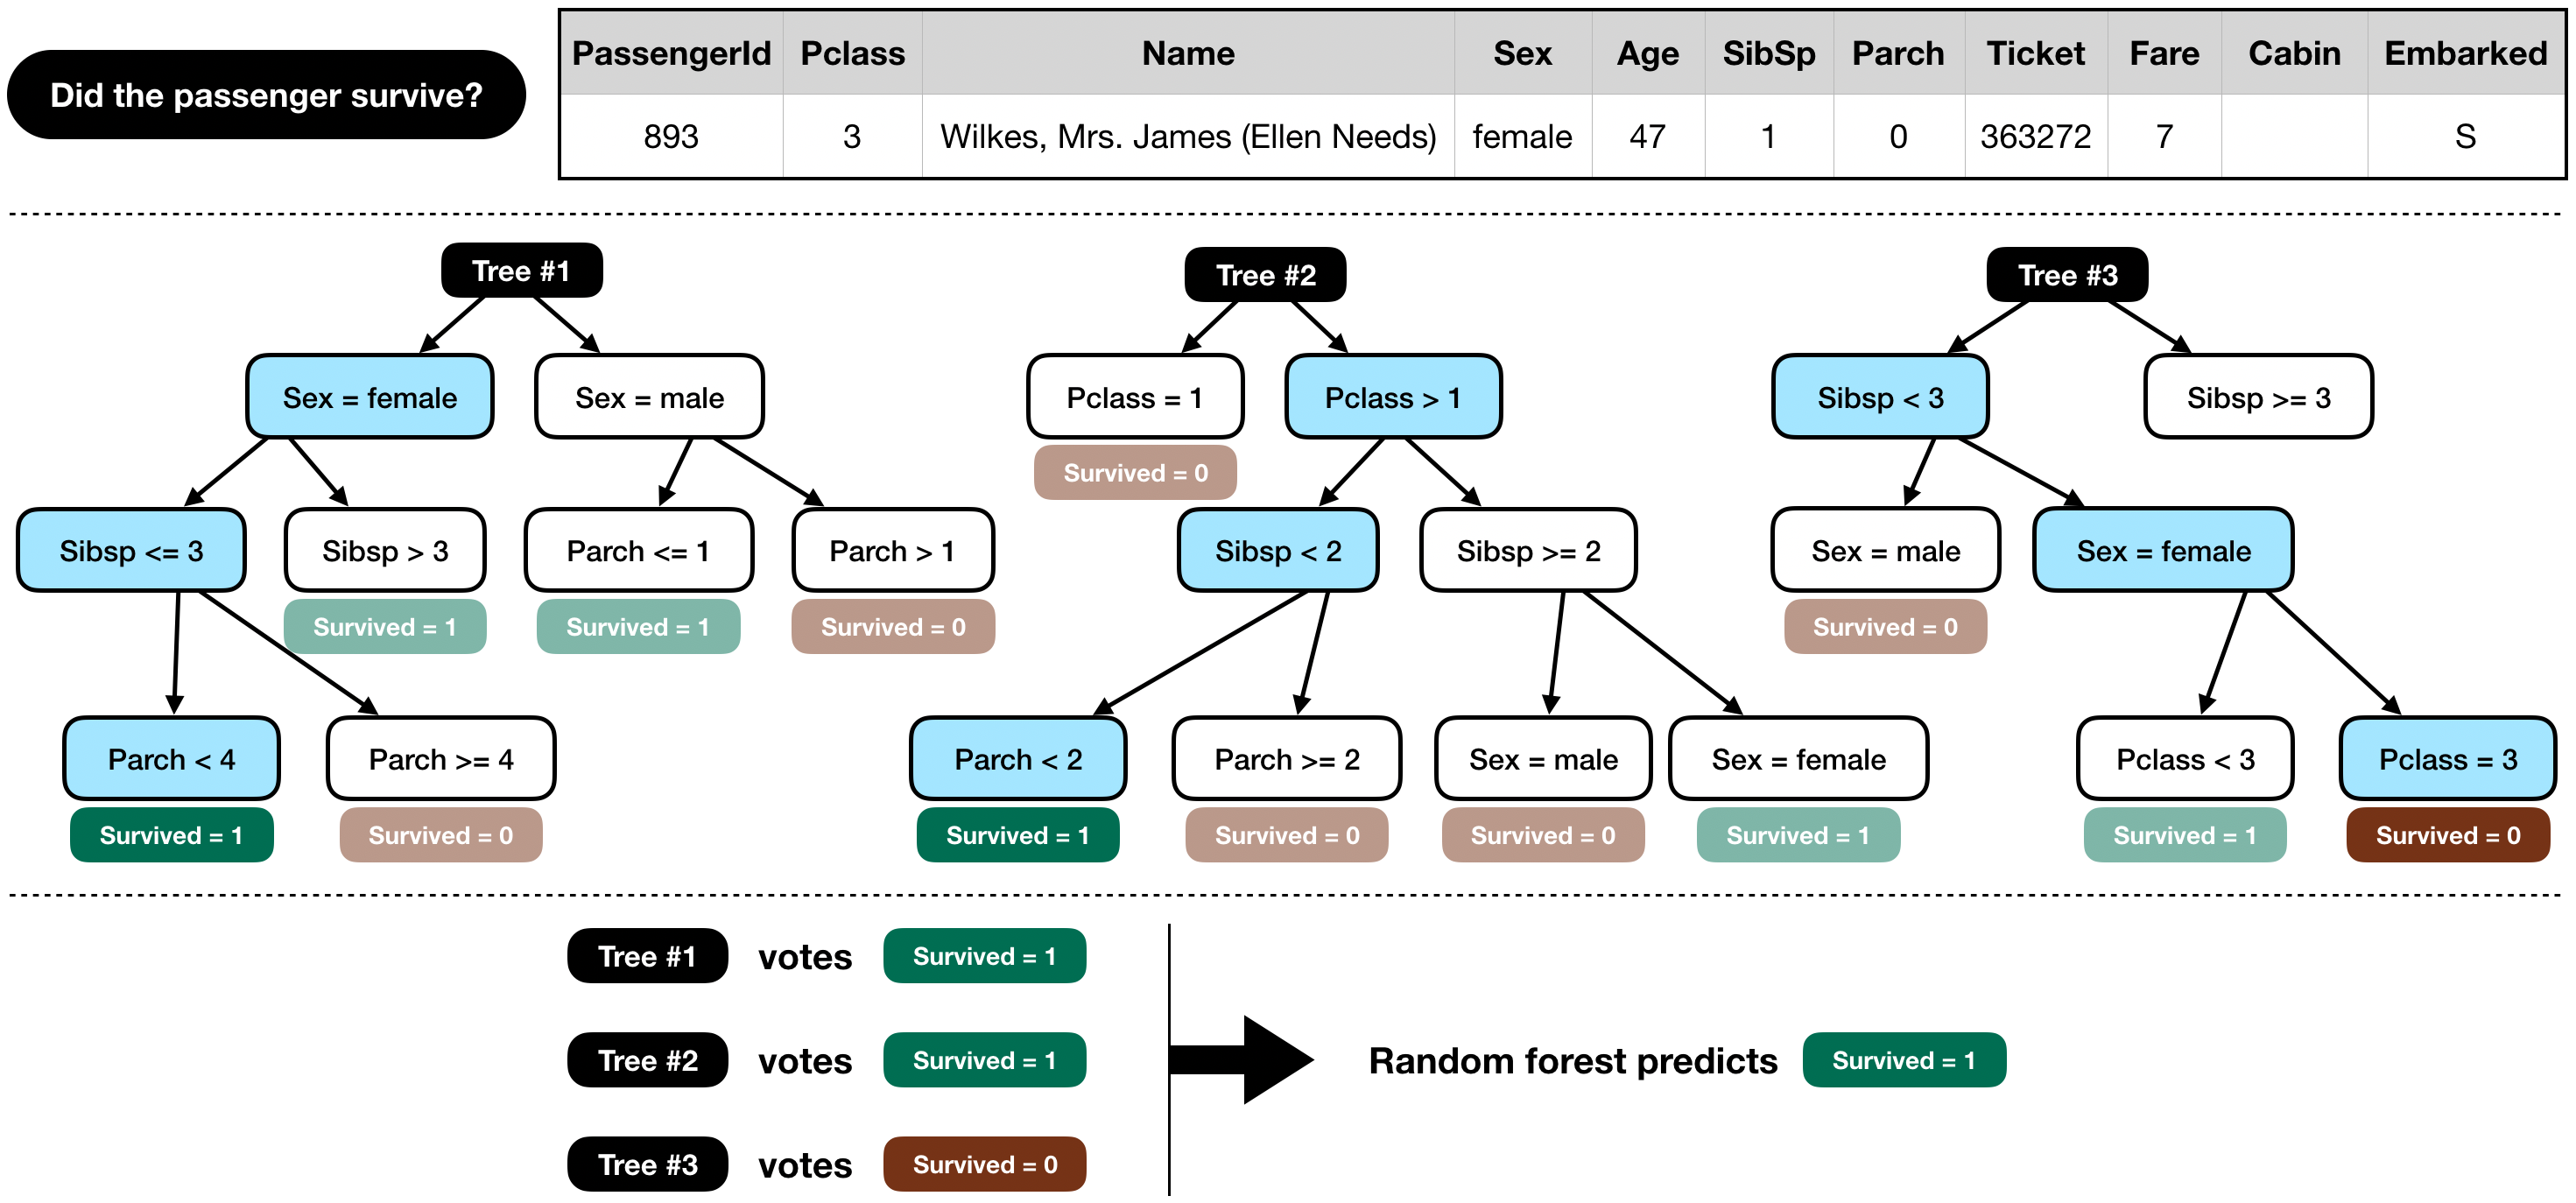

In [28]:
from sklearn.ensemble import RandomForestClassifier

evaluate_training_model_20(X_train, RandomForestClassifier(random_state=SEED))

Accuracy: 0.8156424581005587


(0.8156424581005587, 0.9789325842696629)

### 🧮 Summing up data preparation steps:

In [29]:
def prepare_data(df, ohe_encoder=None):
    df = df.drop('Cabin', axis=1)
    df['Embarked'] = df['Embarked'].fillna('S')
    median_age = df['Age'].median()
    df['Age'] = df['Age'].fillna(median_age)
    
    df = df.drop('PassengerId', axis=1)
    df = df.drop('Name', axis=1)
    df = df.drop('Ticket', axis=1)
    
    return OHE(df, ['Sex', 'Embarked'], ohe_encoder)

df_train = pd.read_csv('Dataset/Titanic/train.csv')
df_test = pd.read_csv('Dataset/Titanic/test.csv')
df_train, ohe_encoder = prepare_data(df_train)

### 🧮 Making predictions

In [30]:
df_test, _ = prepare_data(df_test)

In [31]:
def train_and_predict(df_train, df_test, model, file_name=None):
    if not file_name:
        file_name = "submissions.csv"
    # split the data into train and test
    X_train = df_train.drop(['Survived'], axis=1)
    y_train = df_train['Survived']

    X_test = df_test
    
    # train a model
    model.fit(X_train, y_train)
    
    # predict the survival
    y_pred = model.predict(X_test).astype(int)
    
    submission_df = pd.DataFrame(columns=['PassengerId', 'Survived'])
    submission_df['PassengerId'] = pd.read_csv('Dataset/Titanic/test.csv')['PassengerId']
    submission_df['Survived'] = y_pred
    submission_df.to_csv(file_name, header=True, index=False)

train_and_predict(df_train, df_test, DecisionTreeClassifier(max_depth=7, random_state=SEED), "DecisionTreeClassifier.csv") # Kaggle result: 0.7488
train_and_predict(df_train, df_test, RandomForestClassifier(n_estimators=300, max_depth=7, random_state=SEED), "RandomForestClassifier.csv") # Kaggle result: 0.7846

In [32]:
"""from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Create the parameter grid based on the results of random search
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy', 'log_loss']
}

# Create a based model
lr = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = lr, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(df_train.drop(['Survived'], axis=1), df_train['Survived'])
print(grid_search.best_params_)"""

"from sklearn.model_selection import GridSearchCV\nfrom sklearn.metrics import mean_squared_error\n\n# Create the parameter grid based on the results of random search\nparam_grid = {\n    'n_estimators': [100, 200, 300, 500],\n    'max_features': ['sqrt', 'log2'],\n    'max_depth' : [4,5,6,7,8],\n    'criterion' :['gini', 'entropy', 'log_loss']\n}\n\n# Create a based model\nlr = RandomForestClassifier()\n\n# Instantiate the grid search model\ngrid_search = GridSearchCV(estimator = lr, param_grid = param_grid, \n                          cv = 3, n_jobs = -1, verbose = 2)\n\n# Fit the grid search to the data\ngrid_search.fit(df_train.drop(['Survived'], axis=1), df_train['Survived'])\nprint(grid_search.best_params_)"

In [33]:
train_and_predict(df_train, df_test, RandomForestClassifier(criterion='gini', n_estimators=100, max_depth=8, max_features='log2', random_state=SEED), "1RandomForestClassifier.csv")

### Interesting things to try:
- Libraries Used
    - [Pandas](https://pandas.pydata.org/)
    - [Scikit-learn](https://scikit-learn.org/stable/index.html)
    - [Seaborn](https://seaborn.pydata.org/)
- Datasets
    - [Iris Dataset](https://www.kaggle.com/datasets/uciml/iris/data)
    - [Heart Diesease](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction)
    - [Employee Attrition](https://www.kaggle.com/competitions/summeranalytics2020/overview)
- Model Evaluation
    - [Confusion Matrix](https://www.youtube.com/watch?v=Kdsp6soqA7o) and [F1 score](https://www.youtube.com/watch?v=8d3JbbSj-I8)
    - [ROC and AUC](https://www.youtube.com/watch?v=4jRBRDbJemM)

### TODO (next class!):
1. Cross Validation
2. Grid search
3. Linear Regression